<a href="https://colab.research.google.com/github/nidhishtk/Assignment_07_Clustering/blob/main/Q1_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

## Data Description:

- Murder : Muder rates in different places of United States
- Assualt : Assualt rate in different places of United States
- UrbanPop : urban population in different places of United States
- Rape : Rape rate in different places of United States

## Attaching Resources

### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 2500x1250 with 0 Axes>

### Adding Dataset

In [3]:
from google.colab import files
cd = files.upload()

cd = pd.read_csv('crime_data.csv')

cd.head()

Saving crime_data.csv to crime_data (2).csv


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
cd.rename({'Unnamed: 0':'Place'}, axis = 1, inplace = True)

cd

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [6]:
cd_nrow = cd.shape[0]

In [7]:
def lost_record():

    cd_nrow_now = cd.shape[0]
    lost = cd_nrow - cd_nrow_now
    lost = (lost/cd_nrow)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + ' % data')


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [8]:
cd.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [9]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
cd.isna().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [12]:
uni(cd)



 All Unique Value in Place
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
Total no of unique values 50

 All Unique Value in Murder
[ 0.8  2.1  2.2  2.6  2.7  3.2  3.3  3.4  3.8  4.   4.3  4.4  4.9  5.3
  5.7  5.9  6.   6.3  6.6  6.8  7.2  7.3  7.4  7.9  8.1  8.5  8.8  9.
  9.7 10.  10.4 11.1 11.3 11.4 12.1 12.2 12.7 13.  13.2 14.4 15.4 16.1
 17.4]
Total no of unique values 43

 All Unique Value in Assault
[ 45  46  48  53  56  57  72  81  83  86 102 106 109 11

### Checking for Duplicated Values

In [13]:
cd[cd.duplicated()]

,Place,Murder,Assault,UrbanPop,Rape


- There is no duplicate vale in are dataset

### Visualizing The Data

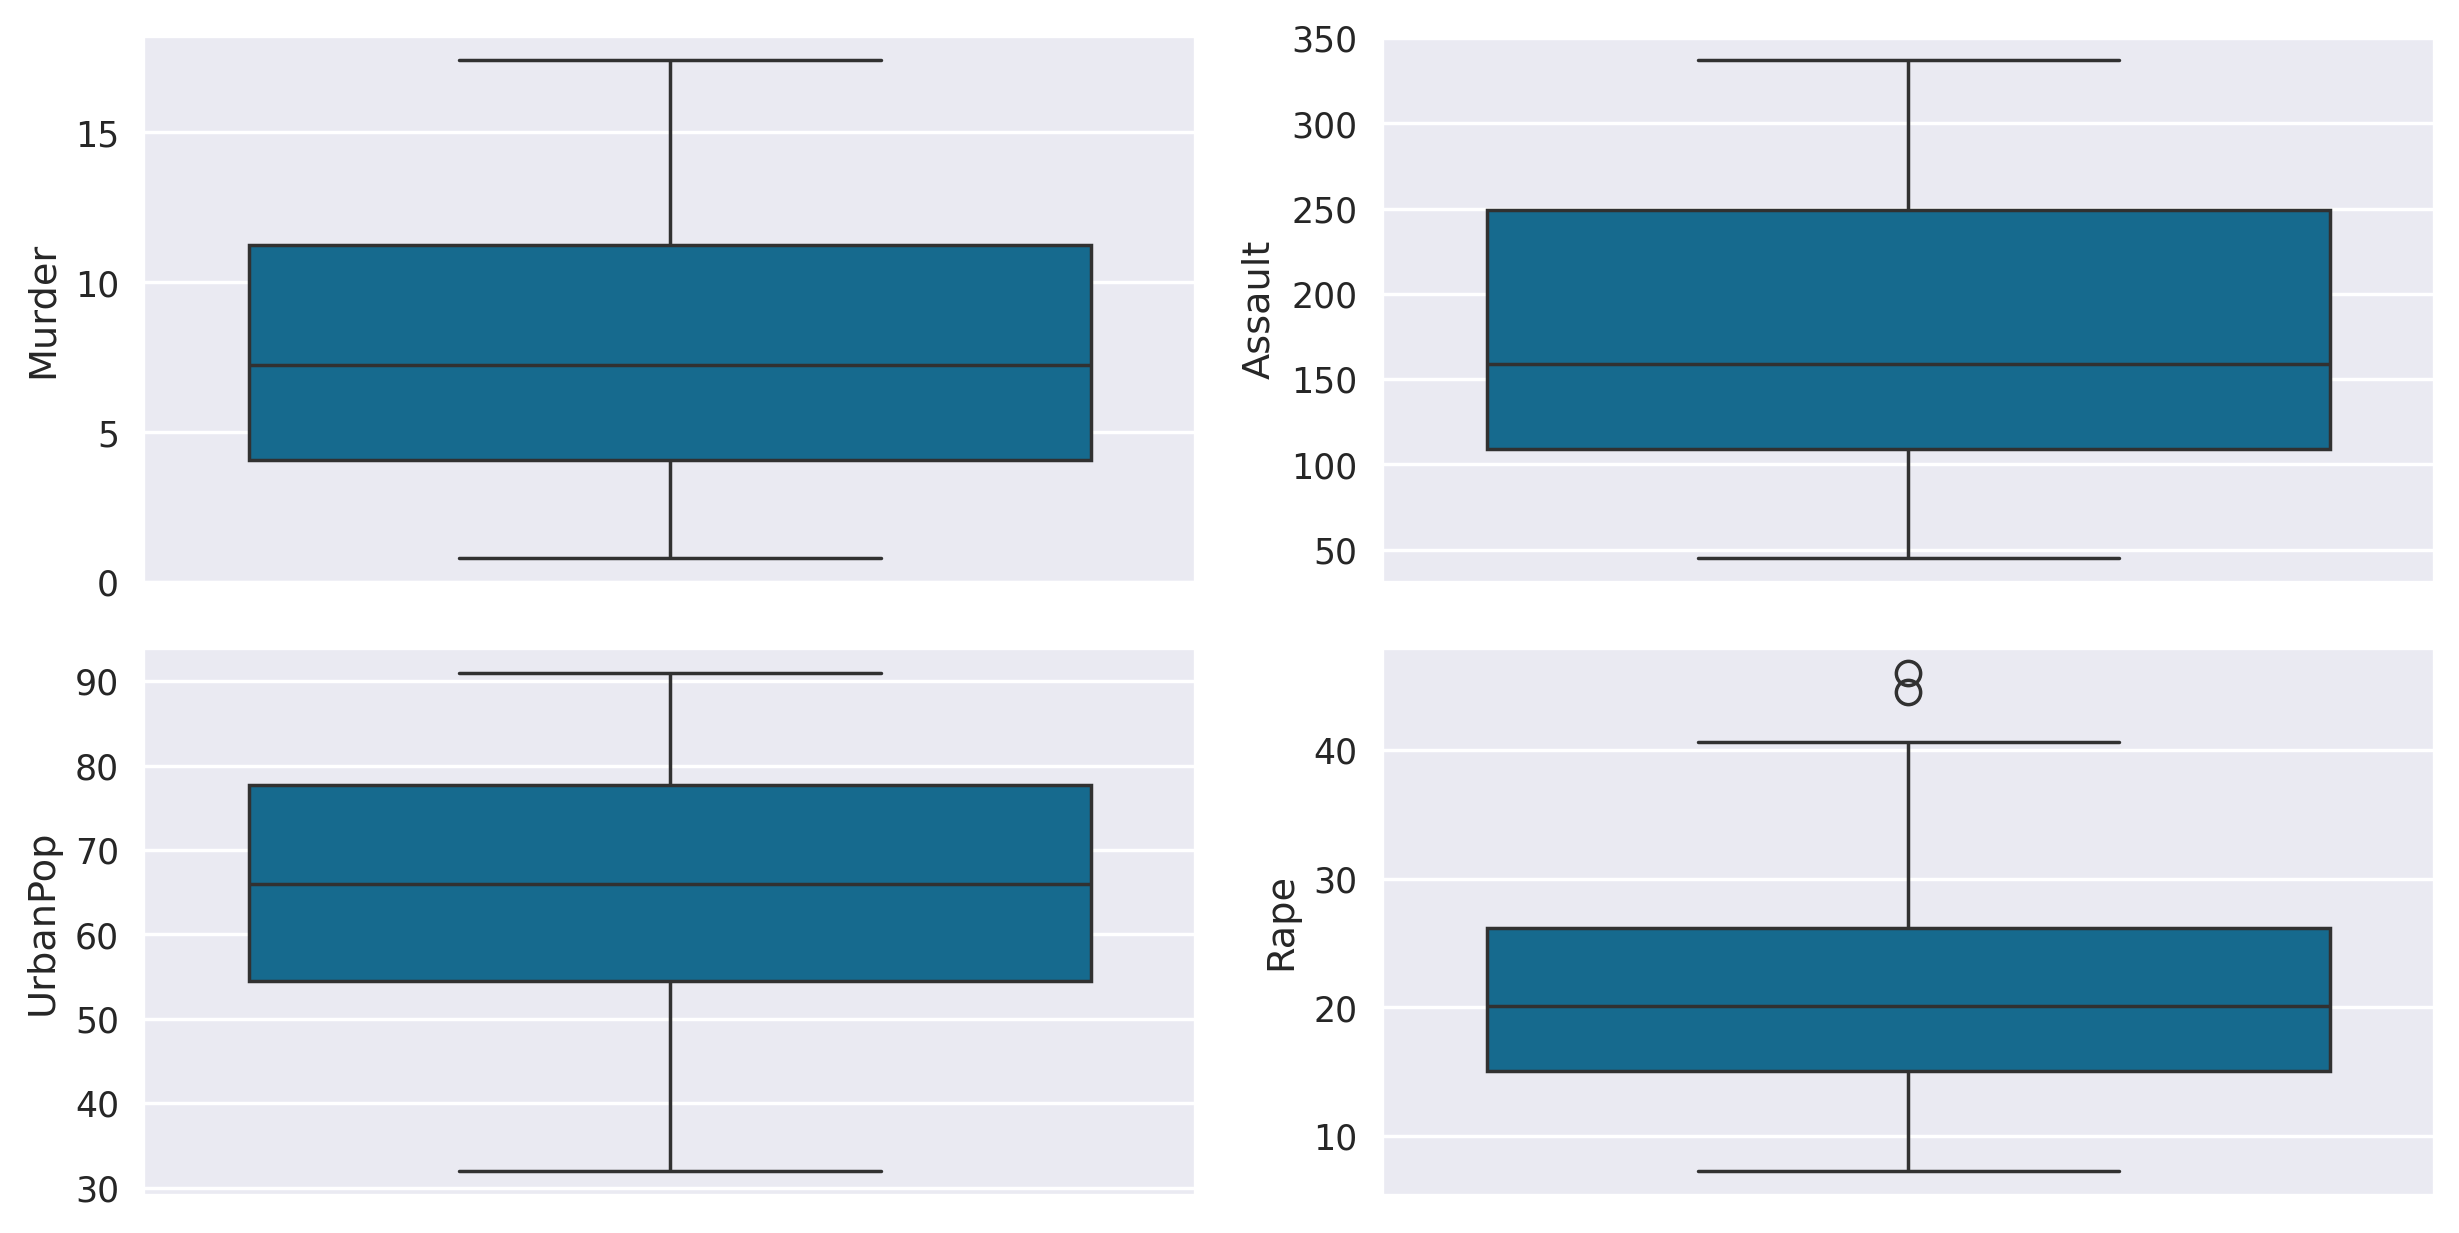

In [14]:
fig, ax = plt.subplots(2, 2)

sns.boxplot(cd['Murder'], ax = ax[0,0])
sns.boxplot(cd['Assault'], ax = ax[0,1])
sns.boxplot(cd['UrbanPop'], ax = ax[1,0])
sns.boxplot(cd['Rape'], ax = ax[1,1])

plt.tight_layout()

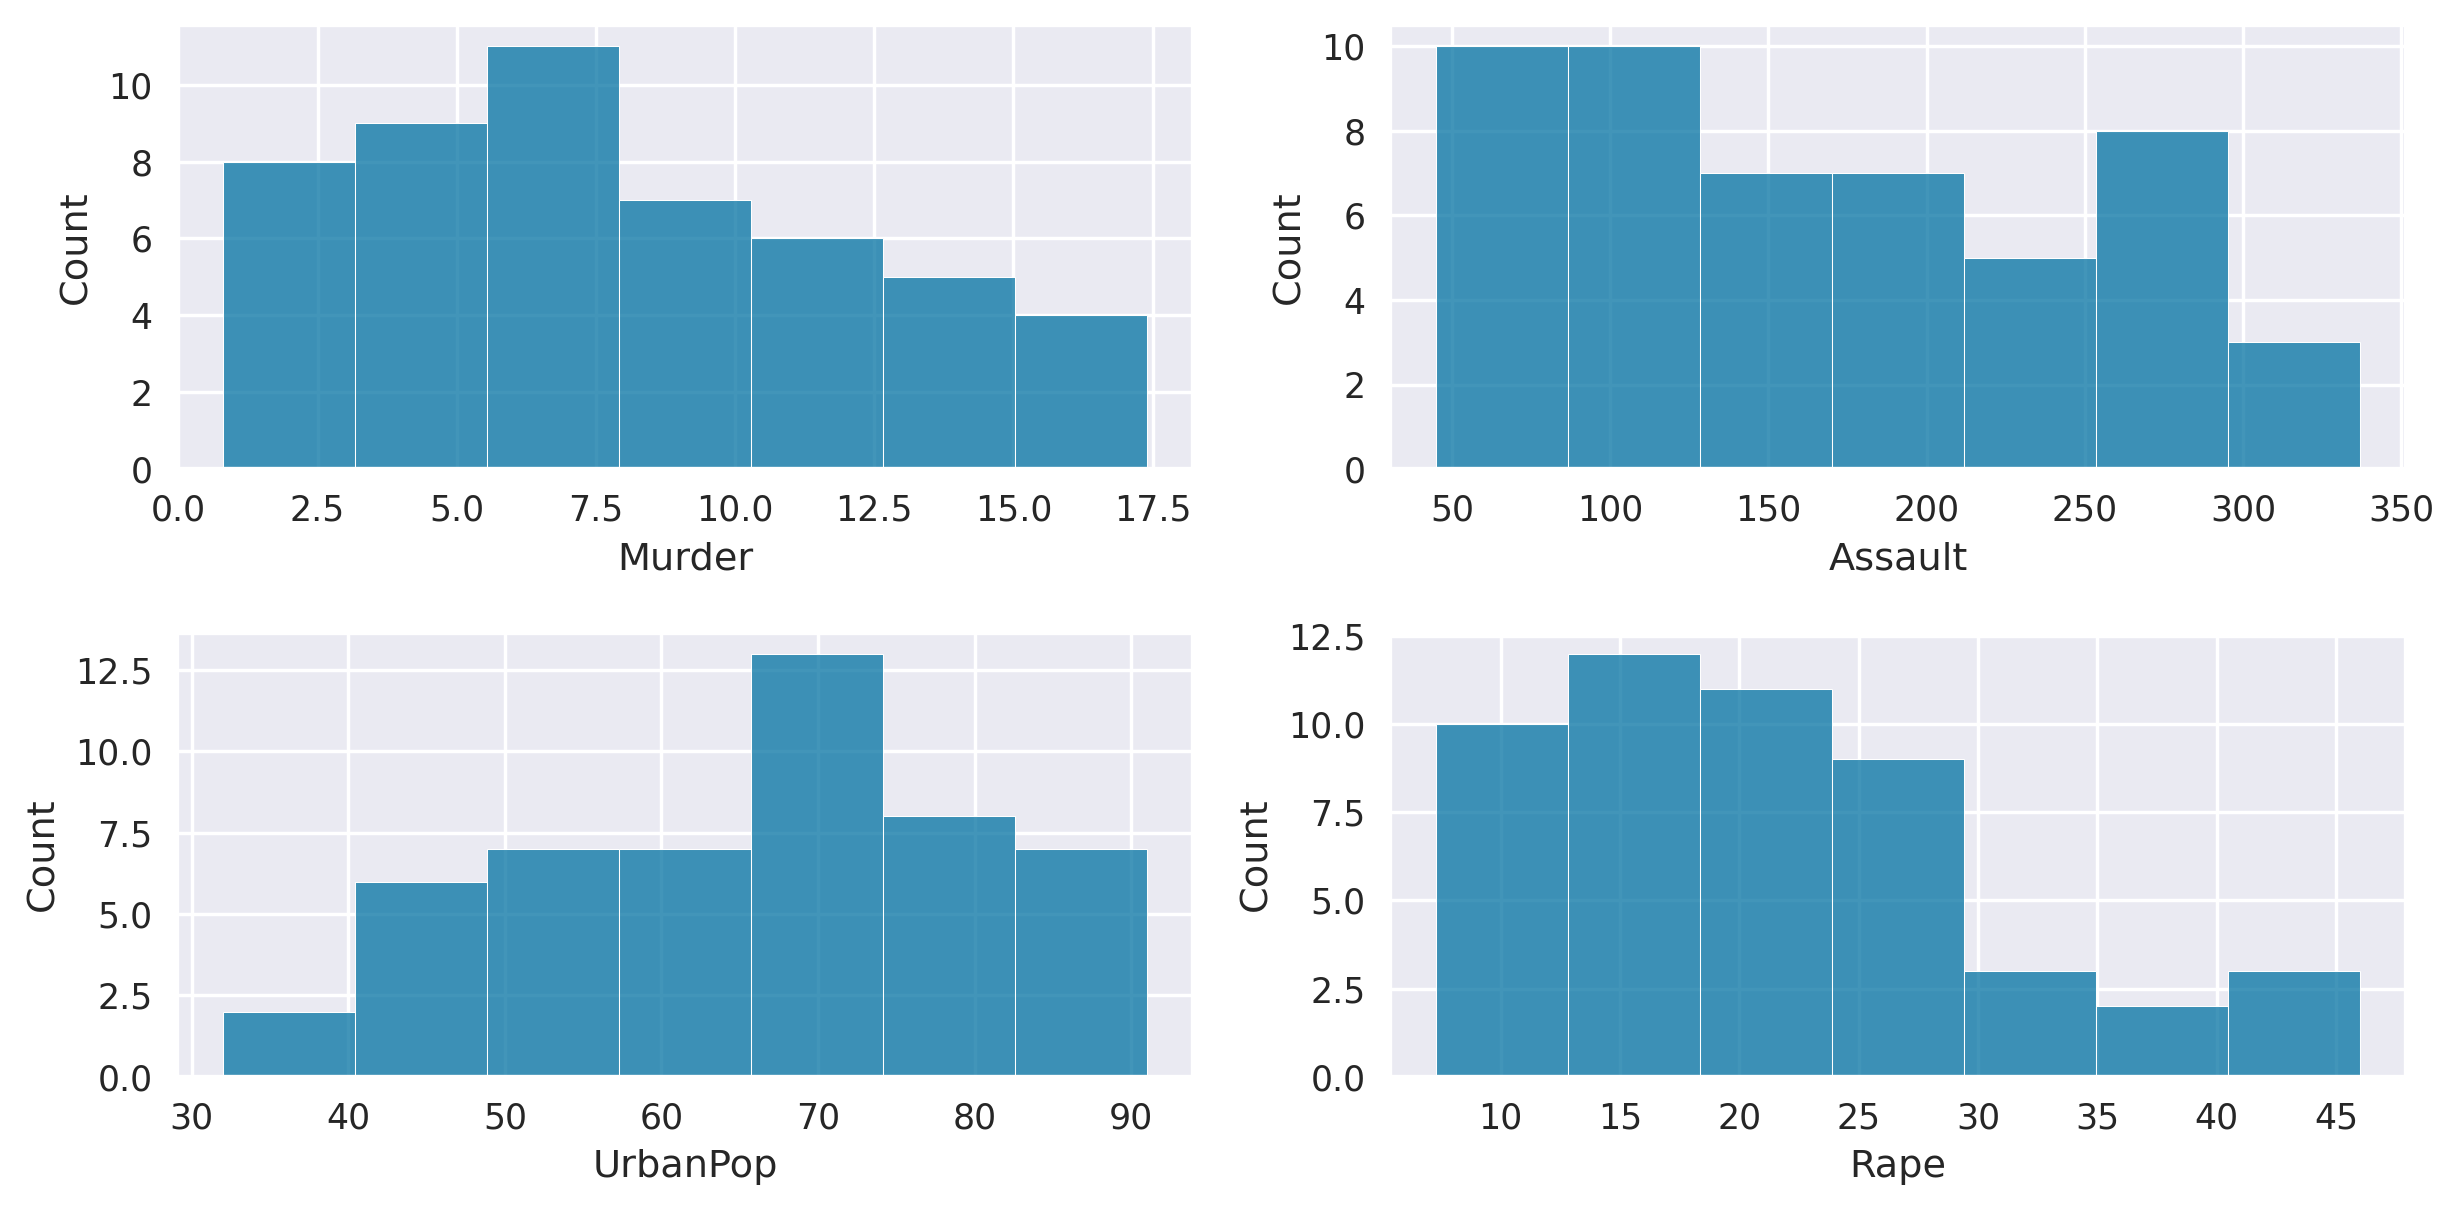

In [15]:
fig, ax = plt.subplots(2, 2)

sns.histplot(cd['Murder'], ax = ax[0,0])
sns.histplot(cd['Assault'], ax = ax[0,1])
sns.histplot(cd['UrbanPop'], ax = ax[1,0])
sns.histplot(cd['Rape'], ax = ax[1,1])

plt.tight_layout()

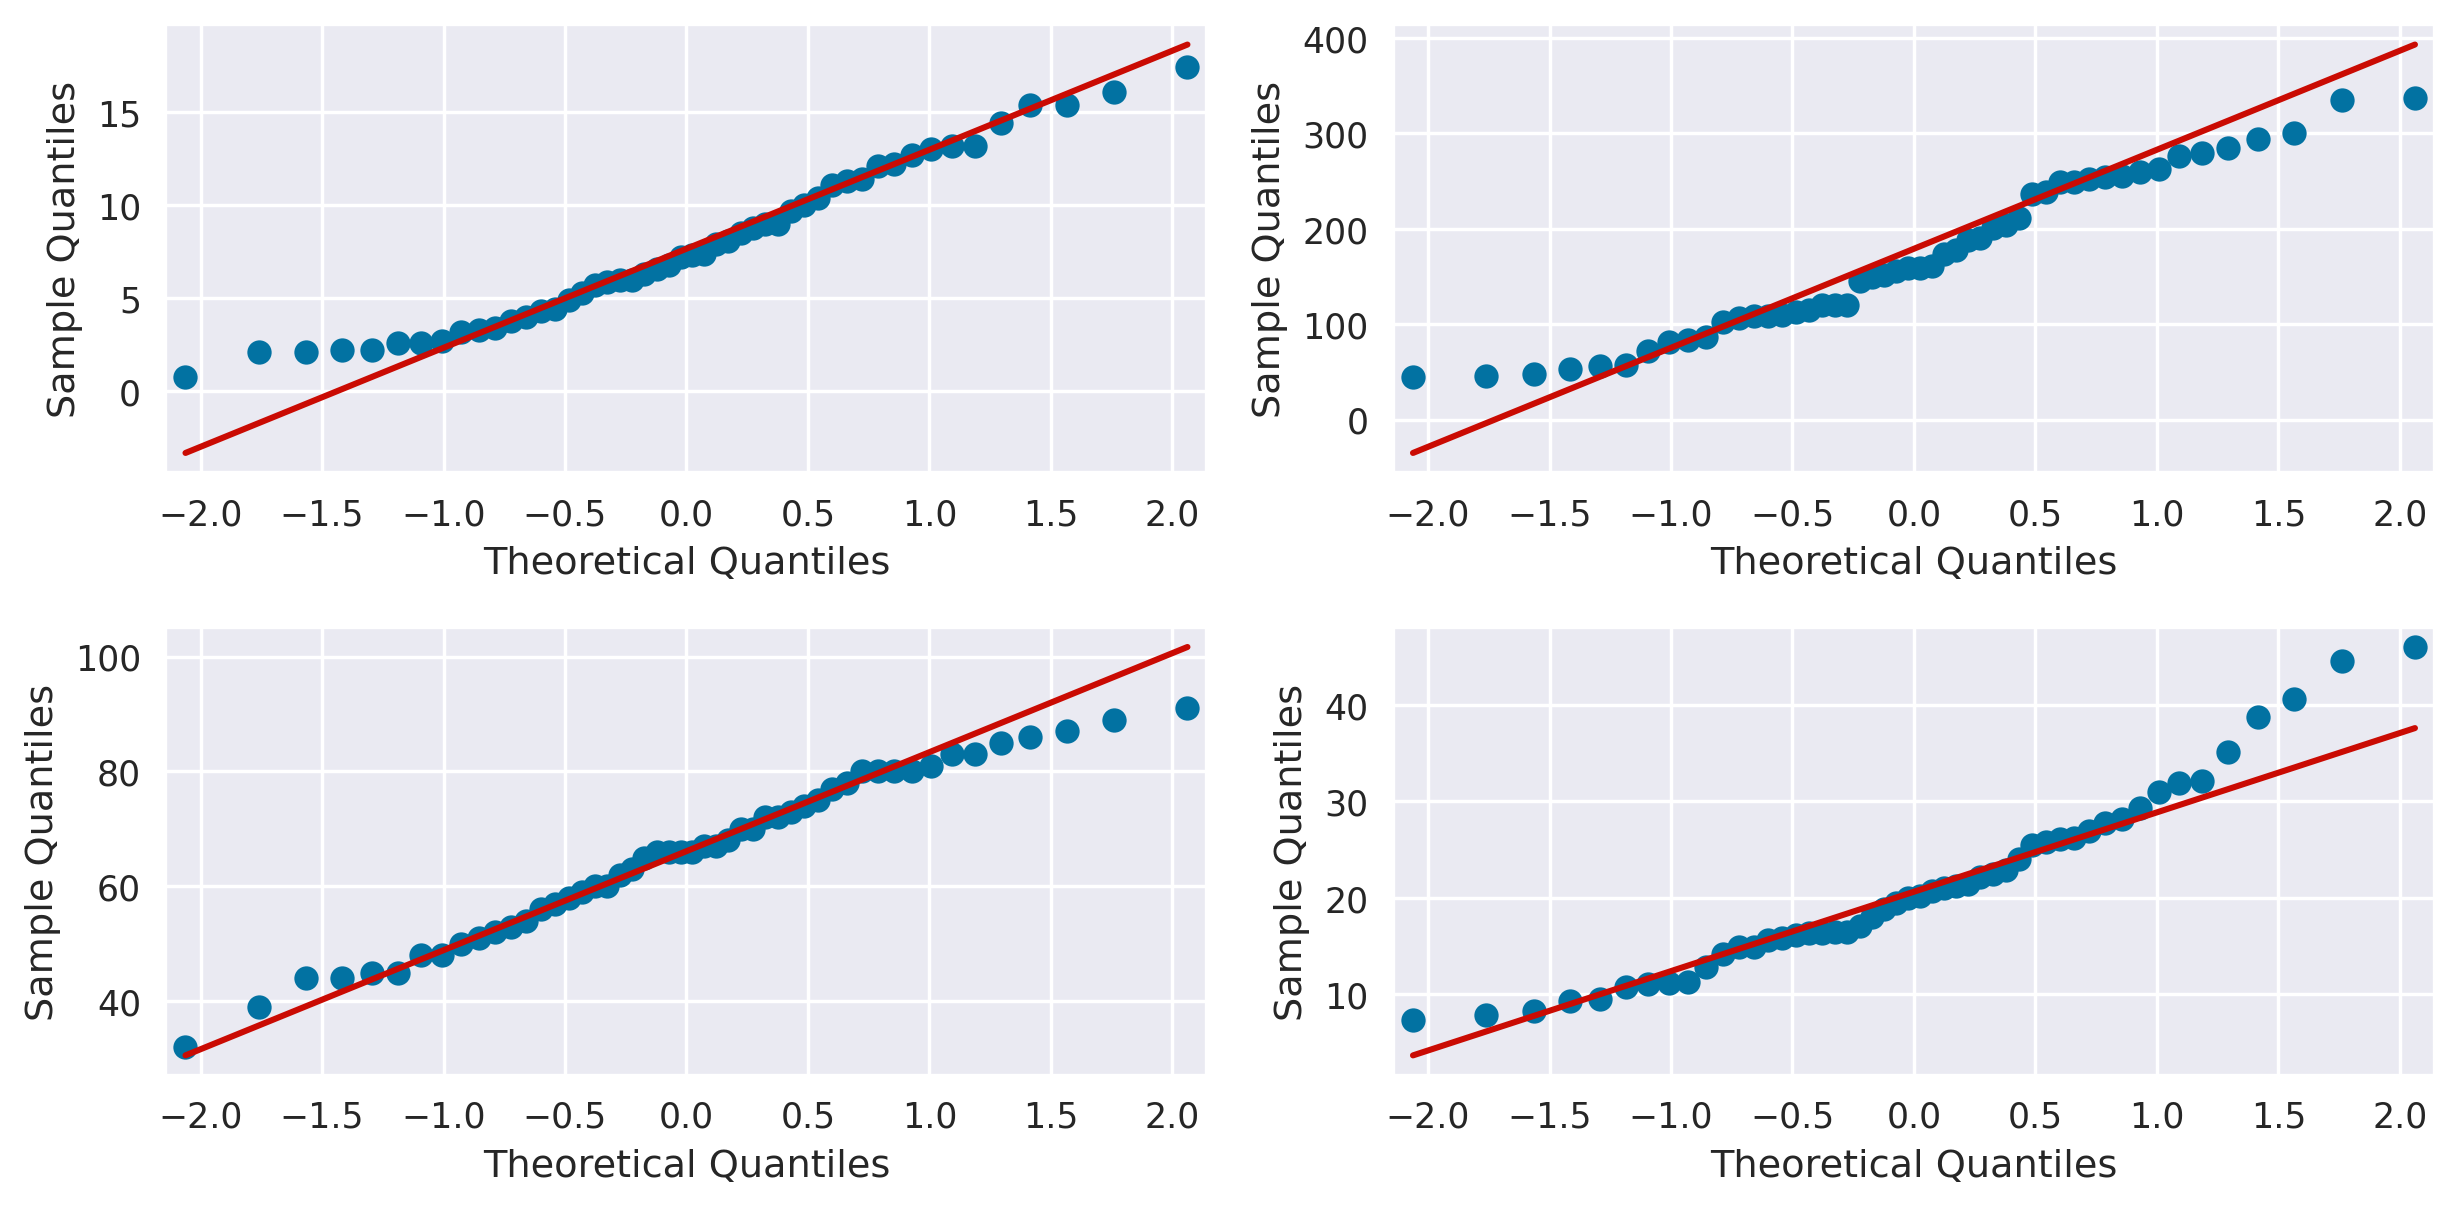

In [16]:
fig, ax = plt.subplots(2, 2)

sm.qqplot(cd['Murder'], ax = ax[0,0], line = 'q')
sm.qqplot(cd['Assault'], ax = ax[0,1], line = 'q')
sm.qqplot(cd['UrbanPop'], ax = ax[1,0], line = 'q')
sm.qqplot(cd['Rape'], ax = ax[1,1], line = 'q')

plt.tight_layout()

### Correlation Analysis

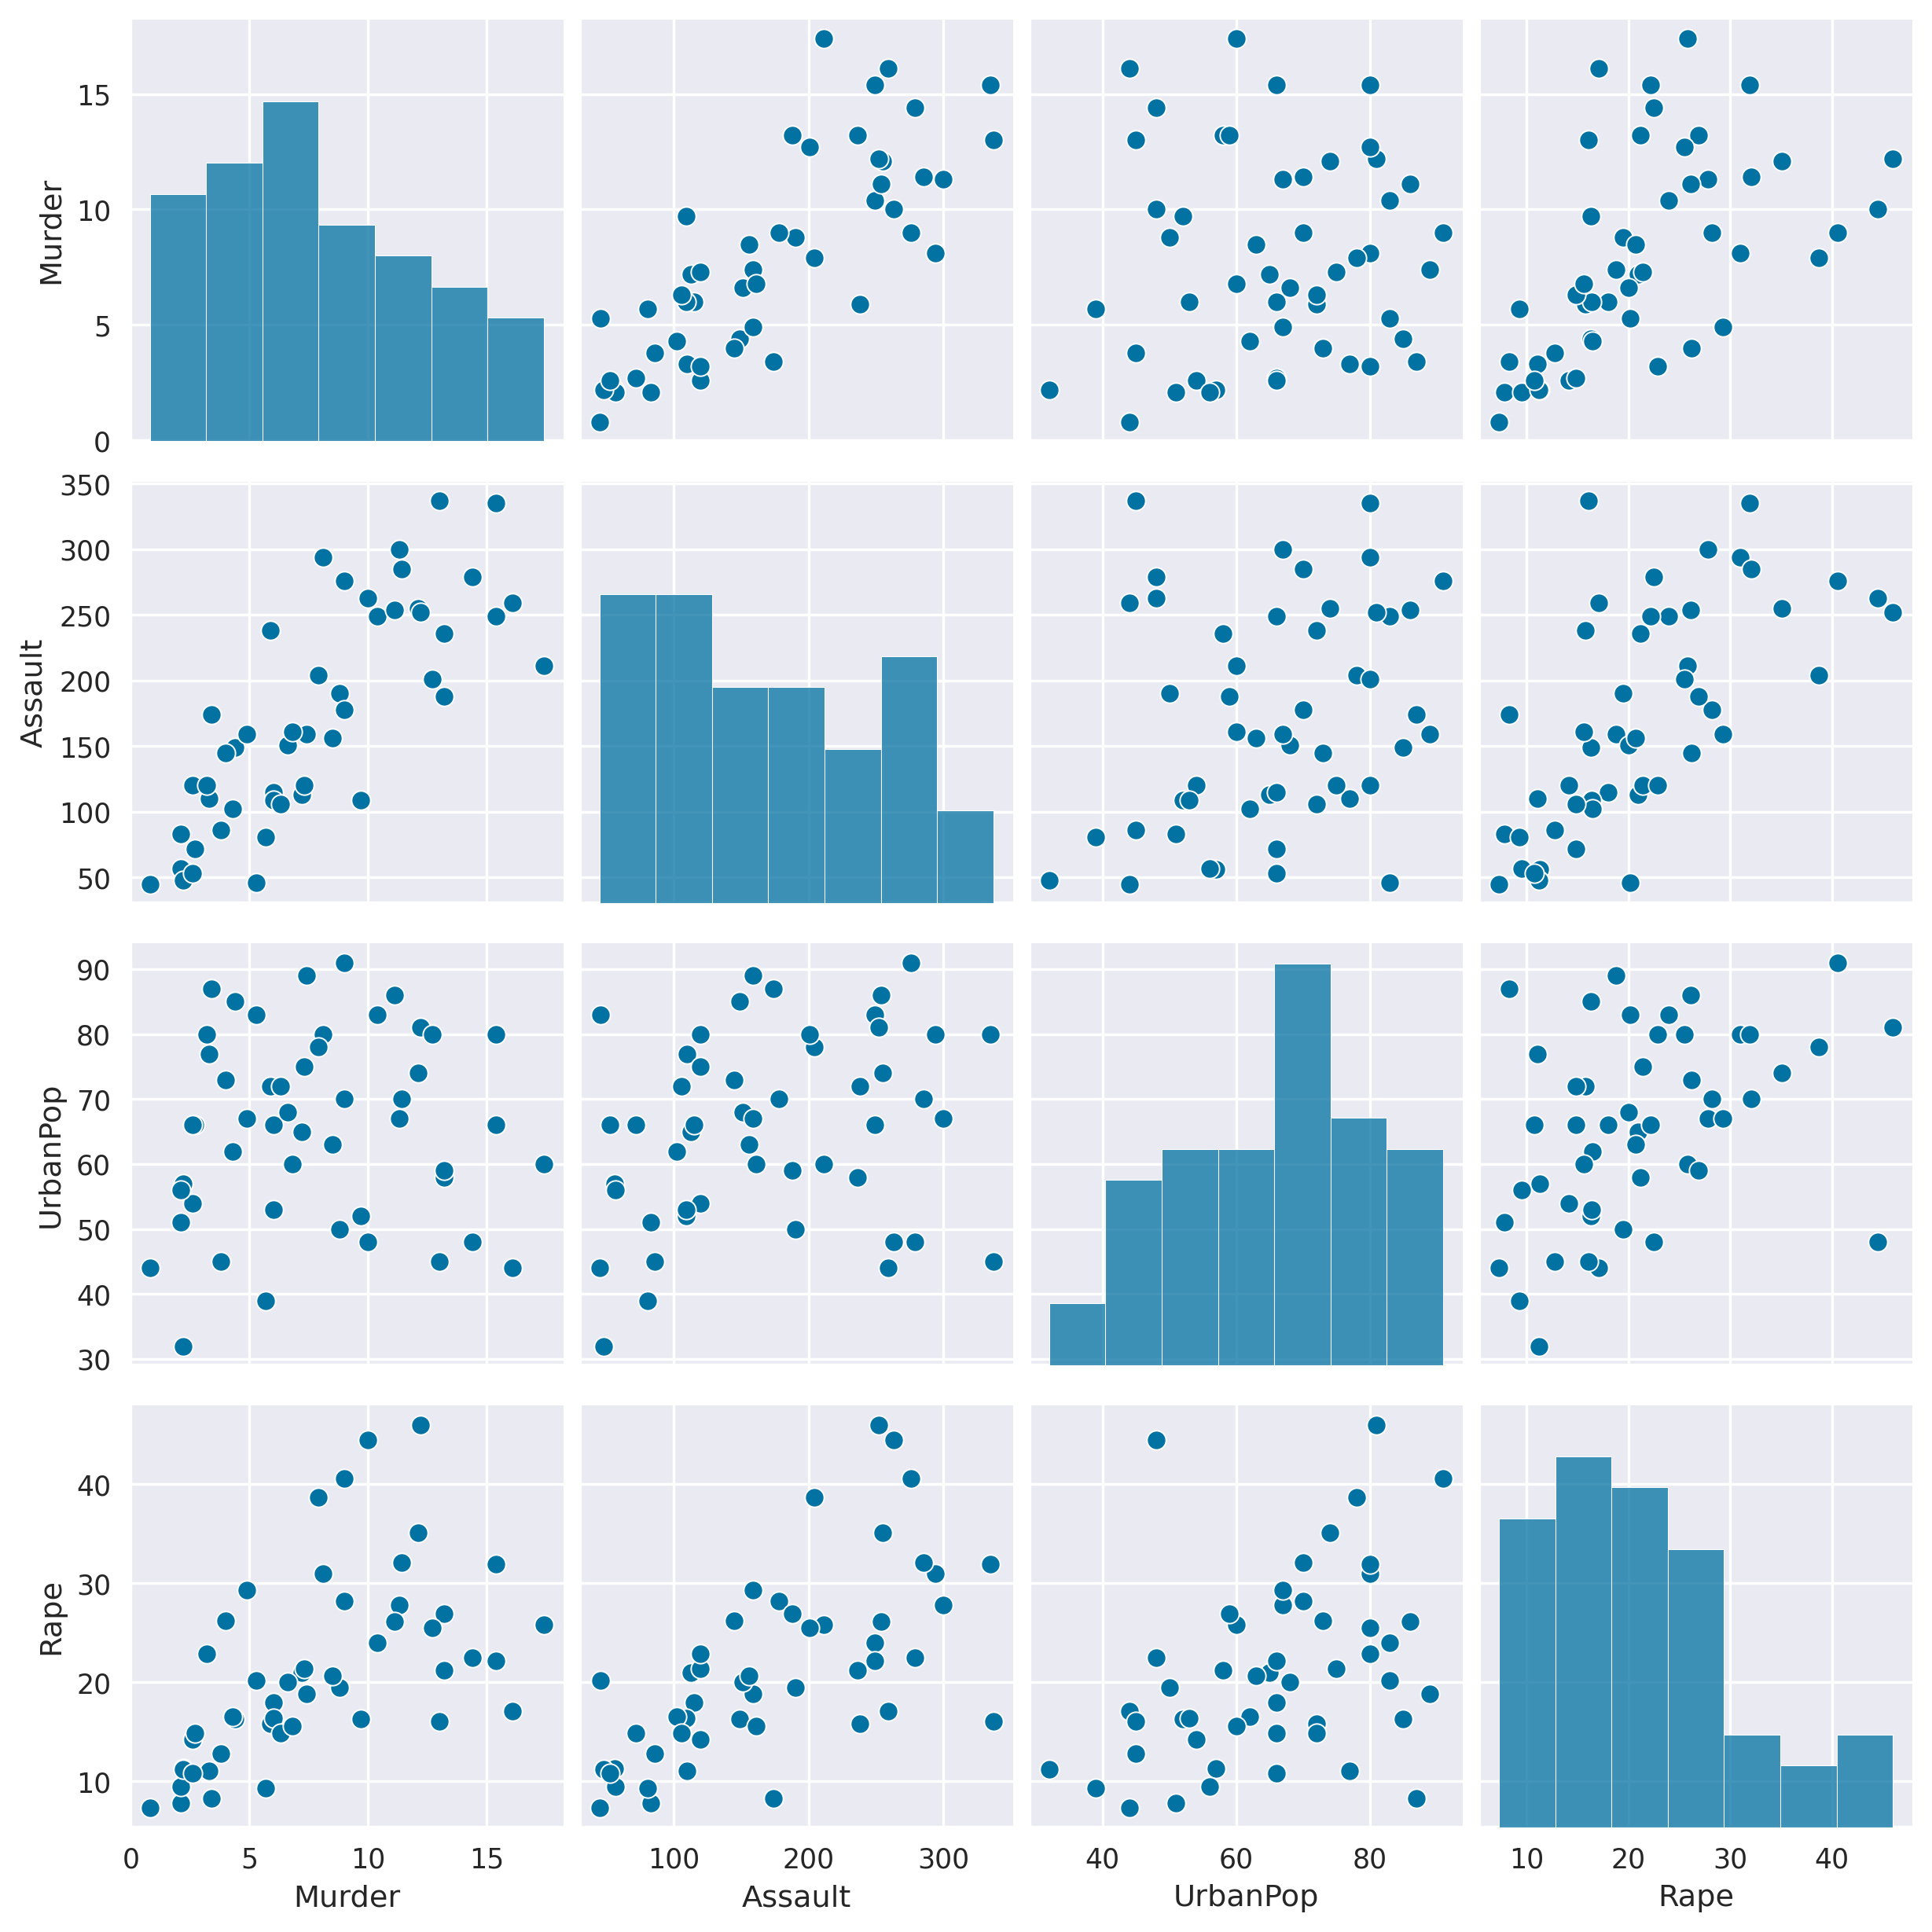

In [17]:
sns.pairplot(data = cd)

<Axes: >

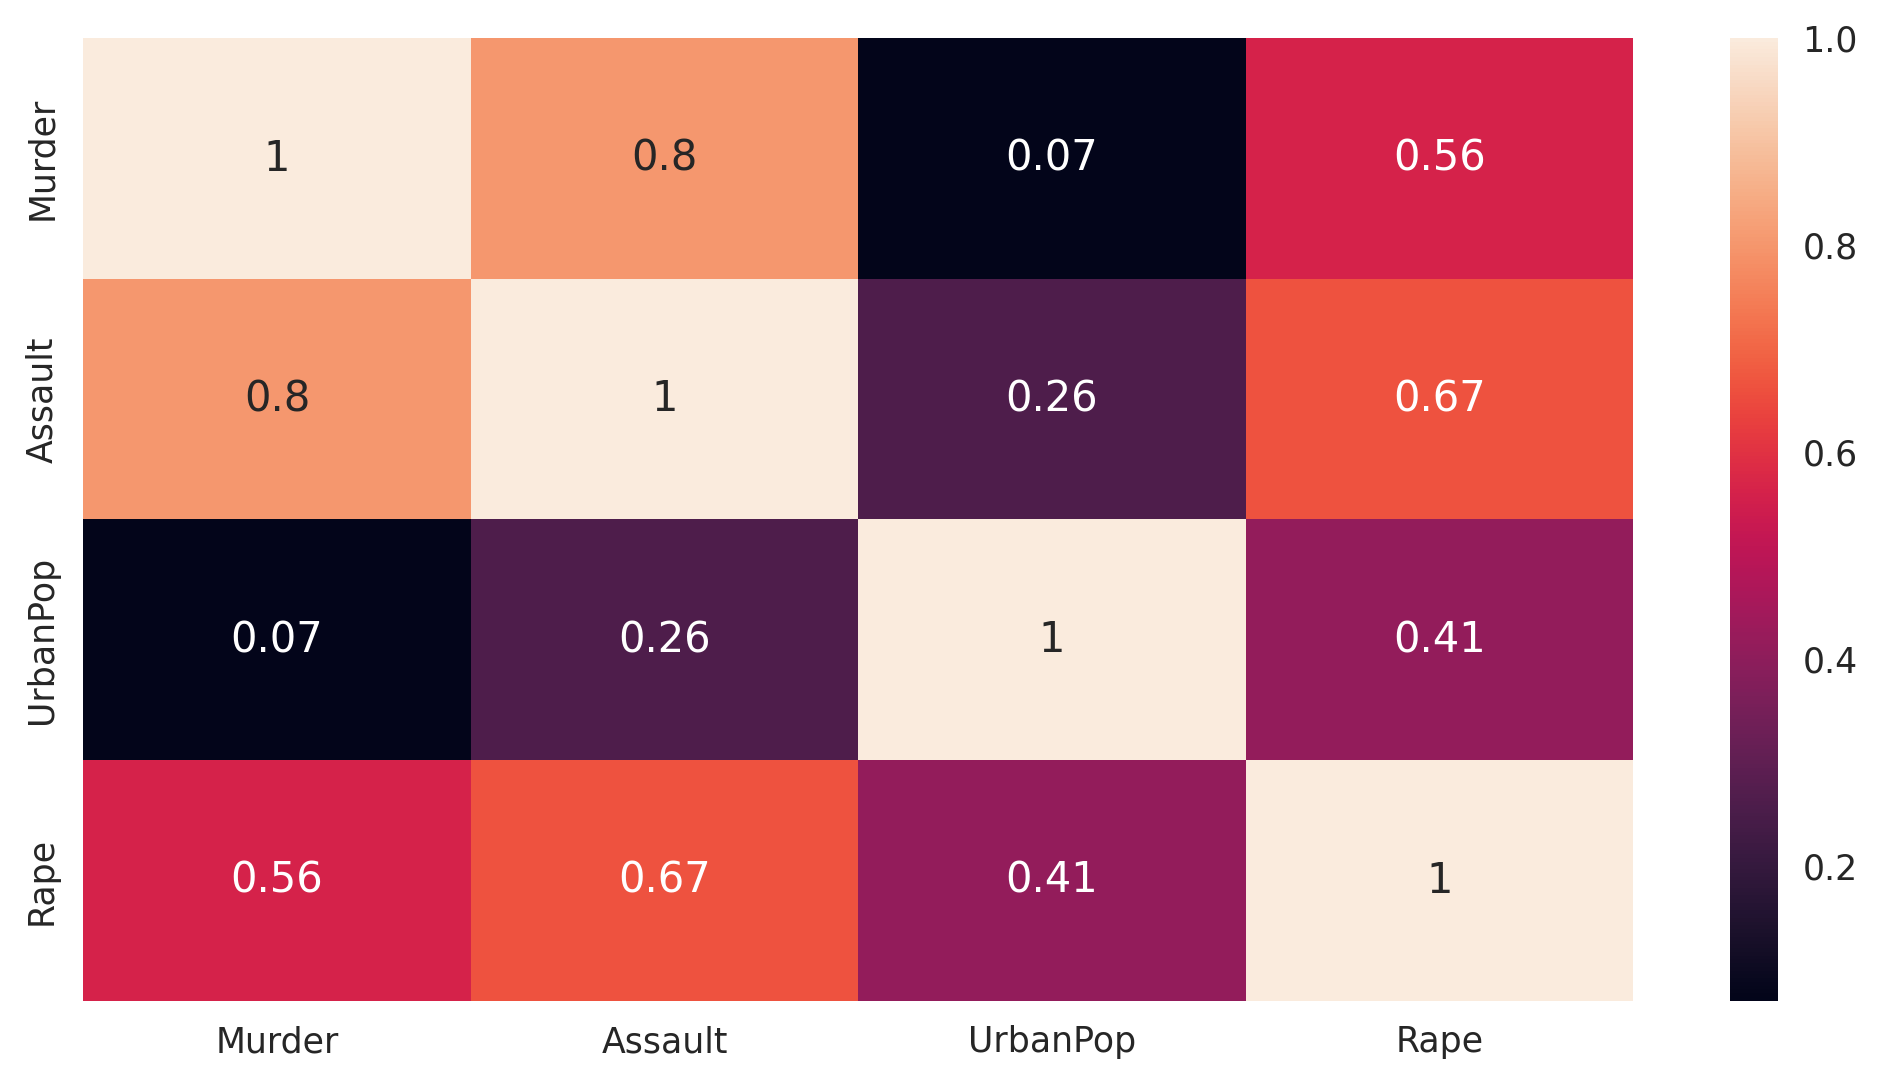

In [18]:
sns.heatmap(cd.corr(), annot=True)

### Creating X Dataset

In [19]:
x= cd.drop(columns = ['Place'])

x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


### Outlier Detection

In [20]:
def outlier_percentage(df):
    for i in range(len(df.columns)):

        q1 = df[df.columns[i]].quantile(0.25)
        q3 = df[df.columns[i]].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[df.columns[i]] > upper])) +
                      (len(df[df[df.columns[i]] < lower])))/len(df[df.columns[i]]))*100

        print(str(df.columns[i]) + ' : ' + str(percentage) + ' %')


In [21]:
def replace_outlier_extream(st, col):

    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st[col].mask(st[col] > upper, upper, inplace=True)
    st[col].mask(st[col] < lower, lower, inplace=True)


In [22]:
def remove_outlier(st, col):
    q1 = st[col].quantile(0.25)
    q3 = st[col].quantile(0.75)
    iqr = q3-q1

    upper = q3 + (iqr*1.5)
    lower = q1 - (iqr*1.5)

    st = st[(st[col] > lower) & (st[col] < upper)]

    return st


#### Outlier Percentage (Before)

In [23]:
outlier_percentage(x)

Murder : 0.0 %
Assault : 0.0 %
UrbanPop : 0.0 %
Rape : 4.0 %


#### Replacing Outlier In Duration Column

In [24]:
pe.box(cd['Rape'], orientation='h')


In [25]:
replace_outlier_extream(cd, 'Rape')


In [26]:
pe.box(cd['Rape'], orientation='h')


## Performing Feature Scaling

In [27]:
x= cd.drop(columns = ['Place'])

x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600


In [28]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

scaled_x.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,0.007199
1,0.513019,1.118060,-1.224067,2.402325
2,0.072361,1.493817,1.009122,1.092620
3,0.234708,0.233212,-1.084492,-0.181088
4,0.281093,1.275635,1.776781,2.155890


## Preparing Model From The Dataset

### Creating Model With Hierarchical Clustering

#### Ploting Dendrogram

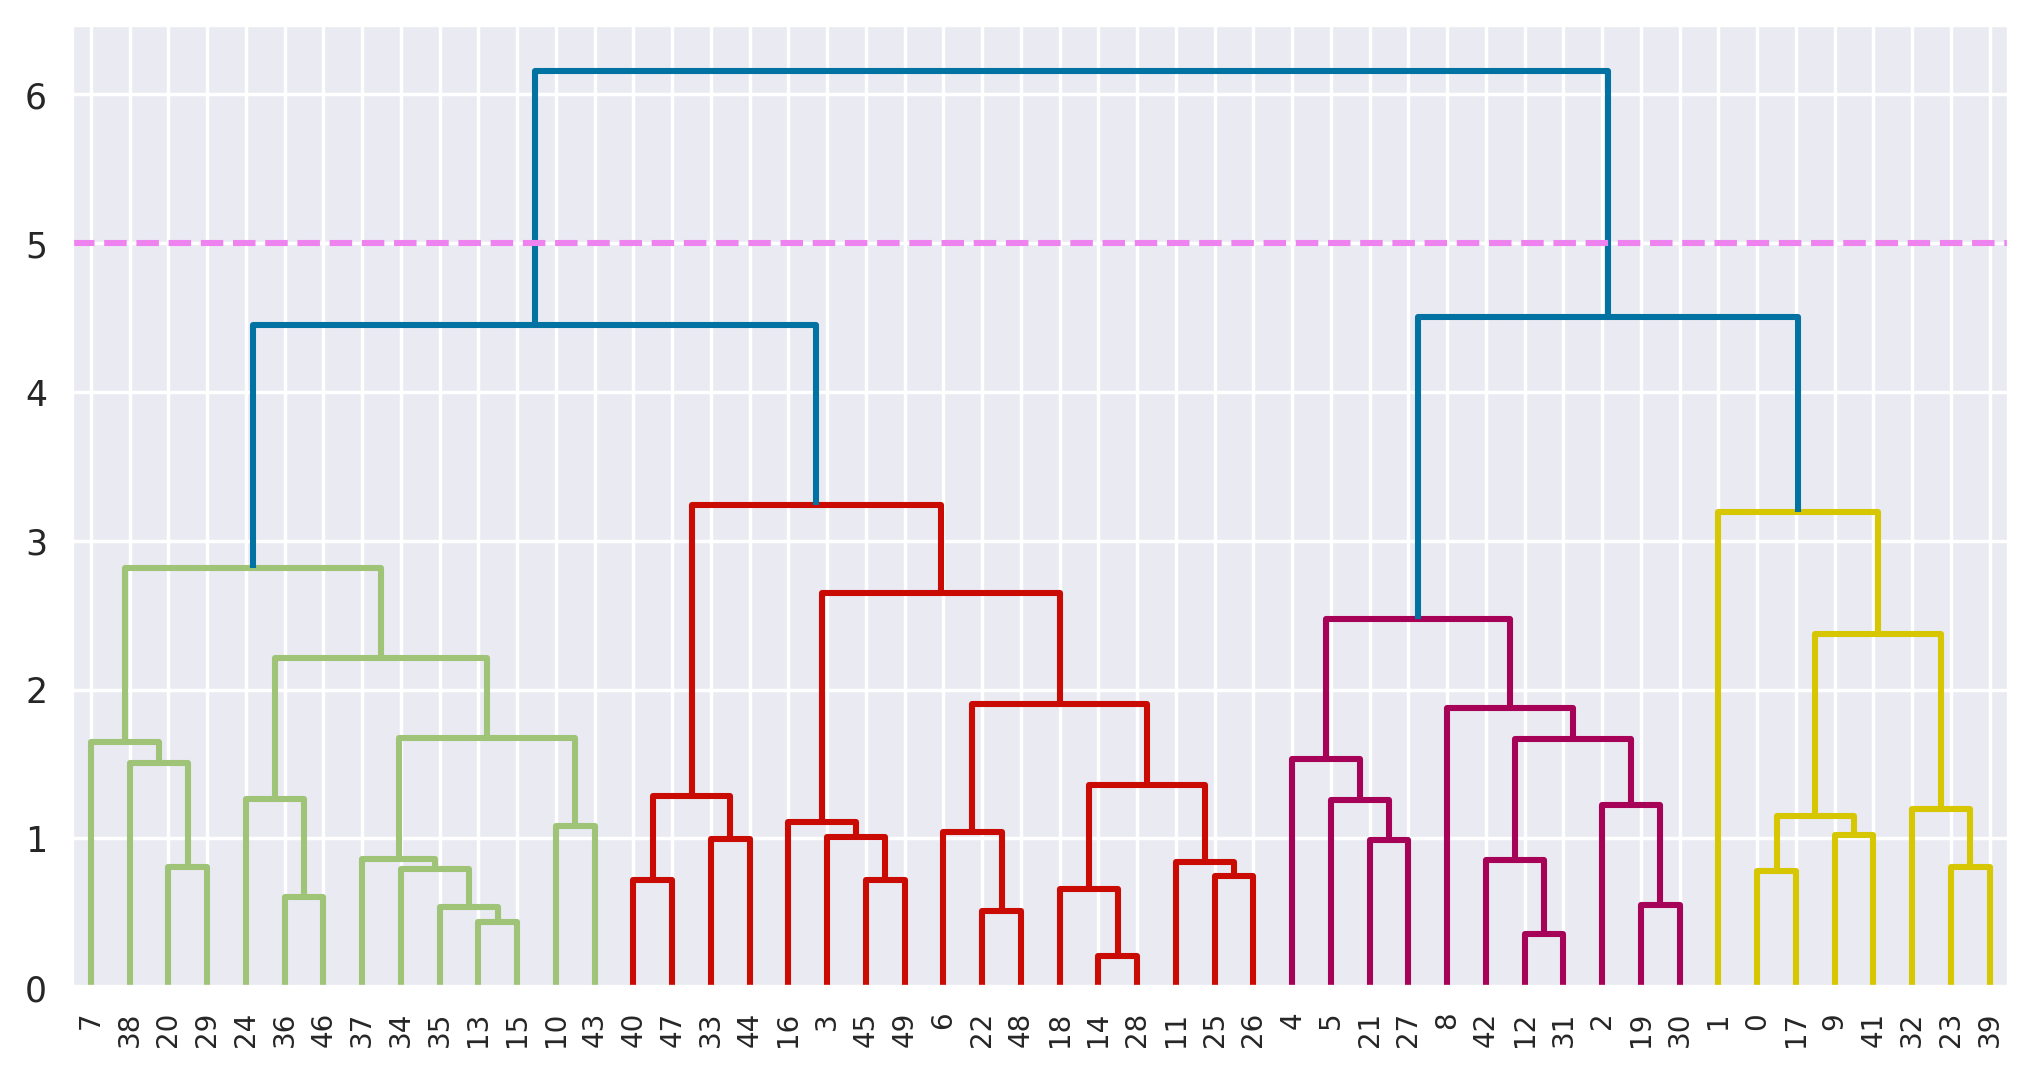

In [29]:
lk_complete = hierarchy.linkage(scaled_x,method='complete')
dendrogram_complete = hierarchy.dendrogram(lk_complete)
plt.axhline(y = 5 , c = 'violet', linestyle = '--')

#### Preparing Hierarchical Clustering Model

In [30]:
hc = AgglomerativeClustering(n_clusters=2)

y_hc = hc.fit_predict(scaled_x)

y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [31]:
cd['Hc_cluster'] = y_hc

cd.head()

,Place,Murder,Assault,UrbanPop,Rape,Hc_cluster
0,Alabama,13.2,236,58,21.200,1
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1
3,Arkansas,8.8,190,50,19.500,0
4,California,9.0,276,91,40.600,1


#### Drawing Inferance From Dataset

In [32]:
cd.groupby('Hc_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Hc_cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,28.960526


- 0 : Low Crime Zone
- 1 : High Crime Zone

#### Evaluating Silhouette Score For Hierarchical Clustering Model

In [34]:
silhouette_score(x,y_hc)

0.5525051827045859

### Creating Model With K-MEANS Clustering

#### Ploting Elbow Graph

In [35]:
def plot_elbow_graph(x,n):
    wcss = []
    n = int(n)
    for i in range(1,n):
        km = KMeans(n_clusters=i)
        km.fit_predict(x)
        wcss.append(km.inertia_)

    sns.lineplot(range(1,n), wcss)
    plt.xlabel('K-values')
    plt.ylabel('WCSS')
    plt.title(label = 'Elbow Graph')

#### Preparing K-MEANS Clustering Model

In [37]:
km = KMeans(n_clusters = 2)
y_km = km.fit_predict(scaled_x)

y_km

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
cd['Km_cluster'] = y_km

cd.head()

,Place,Murder,Assault,UrbanPop,Rape,Hc_cluster,Km_cluster
0,Alabama,13.2,236,58,21.200,High Crime Zone,0
1,Alaska,10.0,263,48,42.825,High Crime Zone,0
2,Arizona,8.1,294,80,31.000,High Crime Zone,0
3,Arkansas,8.8,190,50,19.500,Low Crime Zone,1
4,California,9.0,276,91,40.600,High Crime Zone,0


#### Drawing Inferance From Dataset

In [40]:
cd.groupby('Km_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Km_cluster,,,,
0,12.165,255.250000,68.400000,28.922500
1,4.870,114.433333,63.633333,15.943333


- 0 : low Crime Zone
- 1 : High Crime Zone


##### Labeling The Value

In [41]:
cd['Km_cluster'].replace(to_replace = 0, value = 'Low Crime Zone', inplace = True)
cd['Km_cluster'].replace(to_replace = 1, value = 'High Crime Zone', inplace = True)

##### Ploting Scatter Plot

In [42]:
km.cluster_centers_

array([[ 1.01513667,  1.02412028,  0.19959126,  0.86252211],
       [-0.67675778, -0.68274685, -0.13306084, -0.57501474]])

#### Evaluating Silhouette Score For K-MEANS Model

In [44]:
silhouette_score(x,y_km)

0.5410377383410652

##### Ploting Silhouette Plot

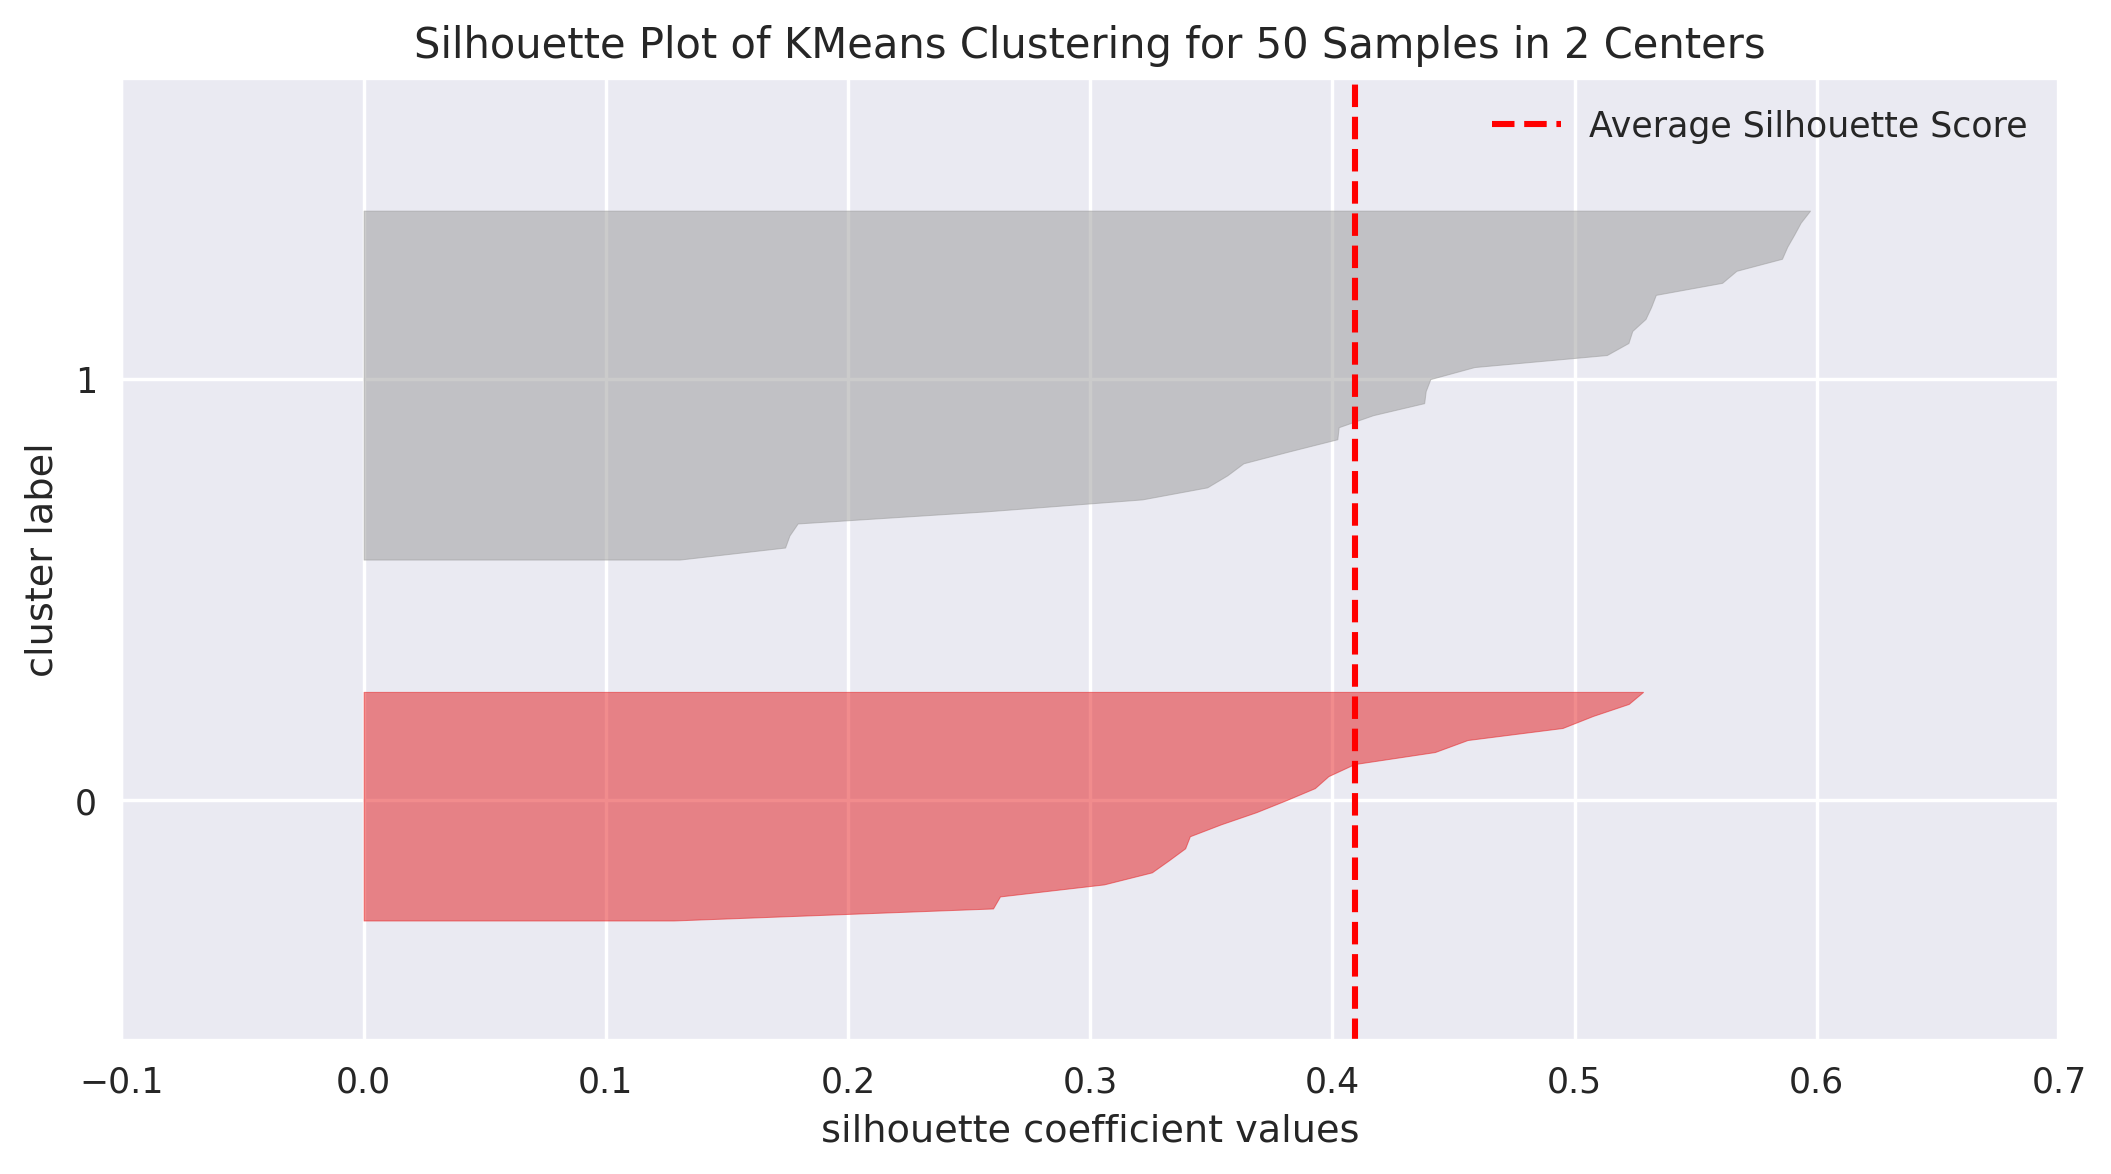

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
vis = SilhouetteVisualizer(km)

vis.fit(scaled_x)
vis.show()

### Creating Model With DB-SCAN Clustering

#### Ploting K-Dist Plot

In [46]:
neigh = NearestNeighbors(n_neighbors = 5).fit(scaled_x)
dist, ind = neigh.kneighbors(scaled_x)

In [47]:
pd.DataFrame(dist)

,0,1,2,3,4
0,0.0,0.780470,0.861361,0.925675,1.148793
1,0.0,1.986146,2.066628,2.195341,2.253346
2,0.0,1.048587,1.090433,1.107695,1.210636
3,0.0,1.006145,1.007681,1.073607,1.243943
4,0.0,1.087743,1.301573,1.345739,1.536324
5,0.0,1.252157,1.259223,1.301573,1.352241
6,0.0,0.886199,0.965379,0.998979,1.046000
7,0.0,1.196970,1.271411,1.428480,1.452909
8,0.0,1.309753,1.351673,1.453775,1.595784
9,0.0,0.872712,1.022878,1.148793,1.413642


Text(0.5, 1.0, 'K-dist Plot')

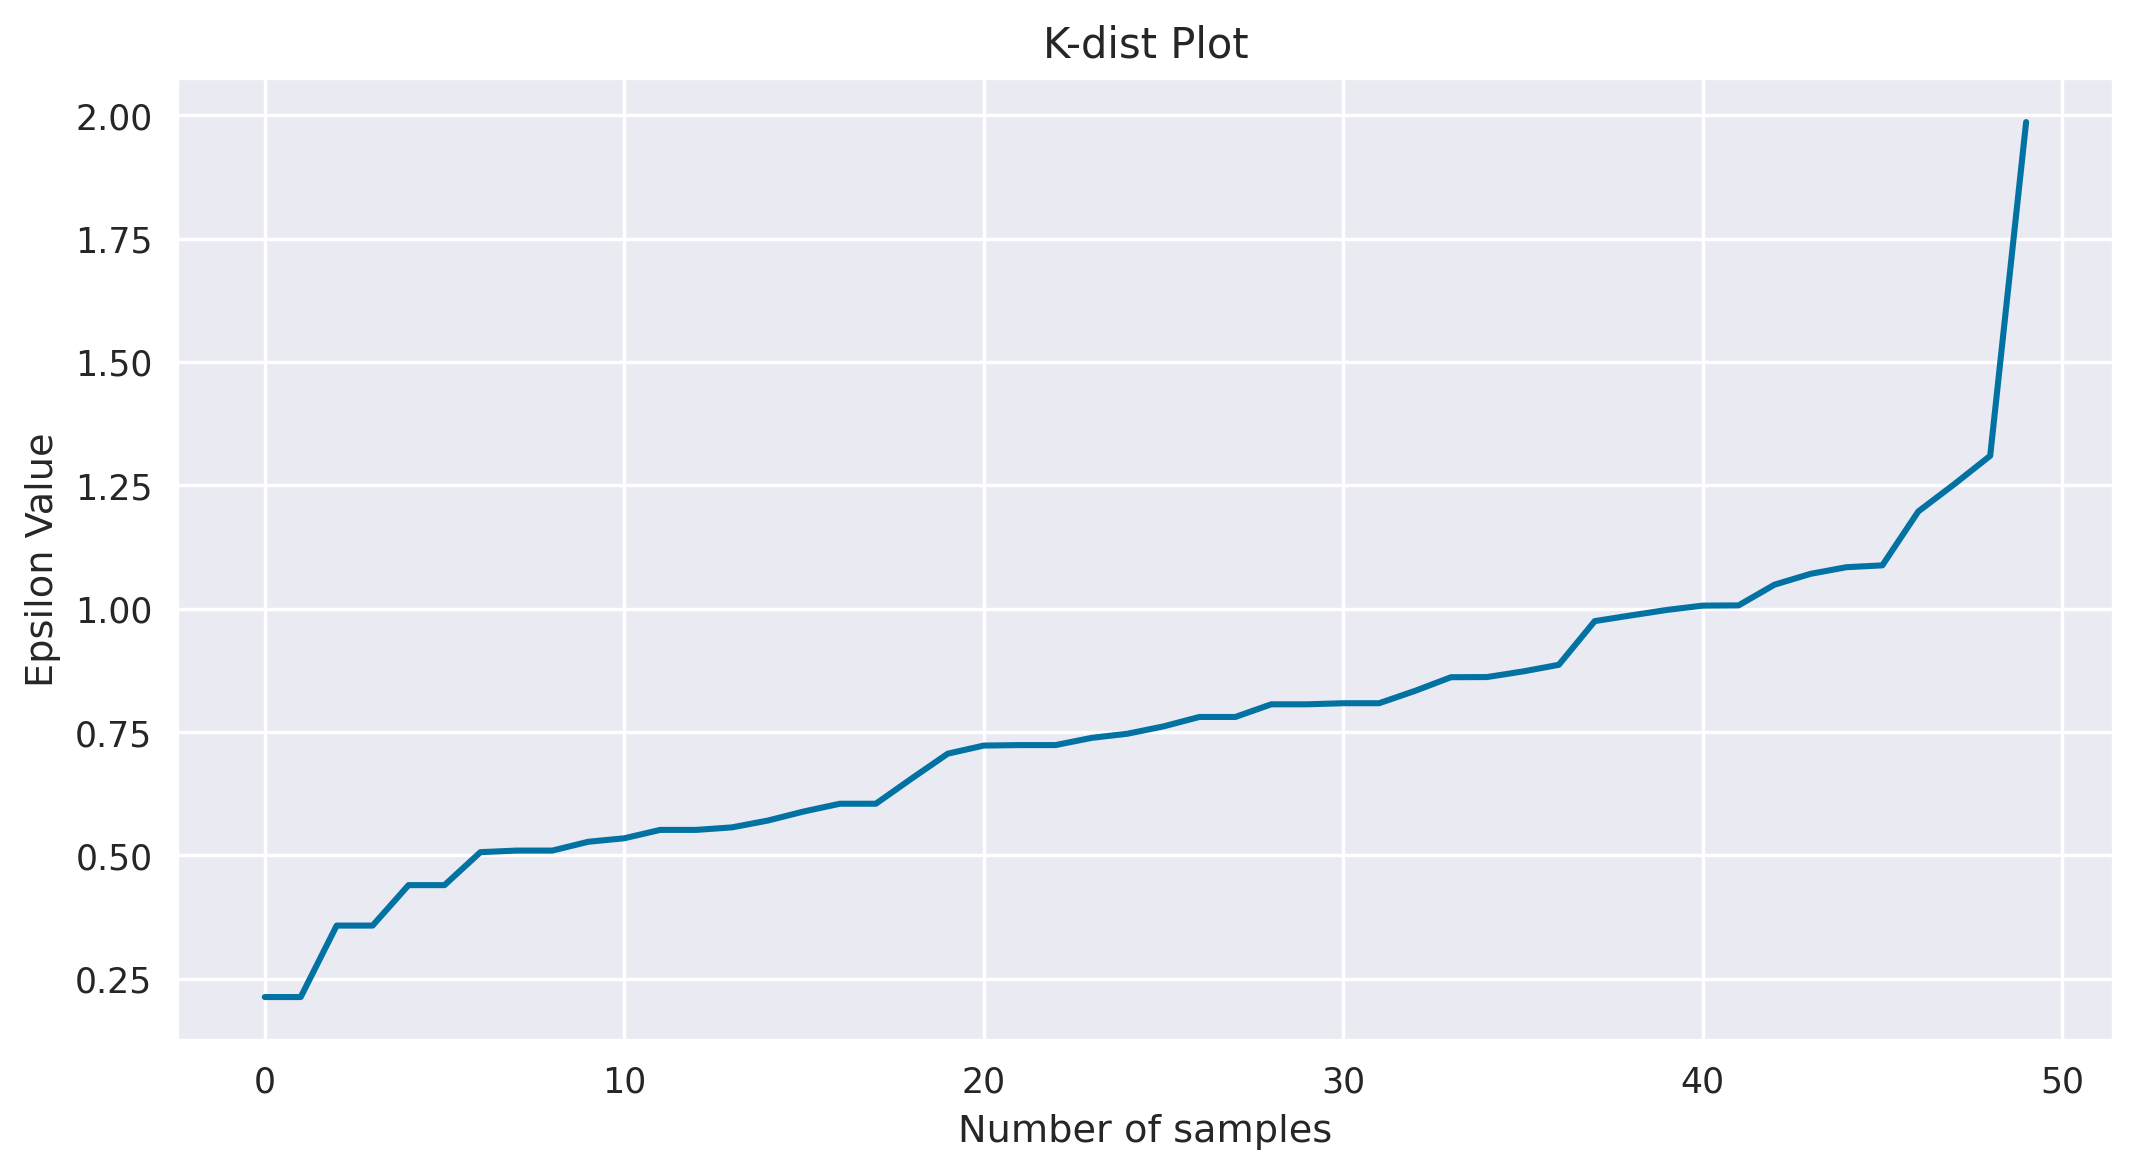

In [48]:
distance = np.sort(dist[:,1], axis = 0)

plt.plot(distance)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

#### Preparing DB-SCAN Model

In [49]:
db = DBSCAN(eps = 1.15, min_samples = 3)
y_db = db.fit_predict(scaled_x)

y_db

array([ 0, -1,  1,  2,  1, -1,  2, -1, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2,  1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2])

In [50]:
cd['Db_cluster'] = y_db

cd.head()

,Place,Murder,Assault,UrbanPop,Rape,Hc_cluster,Km_cluster,Db_cluster
0,Alabama,13.2,236,58,21.200,High Crime Zone,Low Crime Zone,0
1,Alaska,10.0,263,48,42.825,High Crime Zone,Low Crime Zone,-1
2,Arizona,8.1,294,80,31.000,High Crime Zone,Low Crime Zone,1
3,Arkansas,8.8,190,50,19.500,Low Crime Zone,High Crime Zone,2
4,California,9.0,276,91,40.600,High Crime Zone,Low Crime Zone,1


#### Drawing Inferance From Dataset

In [51]:
cd.groupby('Db_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Db_cluster,,,,
-1,9.800000,260.000000,69.500000,32.306250
0,14.671429,251.285714,54.285714,21.685714
1,10.922222,262.888889,79.111111,31.669444
2,4.973333,112.433333,63.566667,16.356667


- -1 : Outlier
- 0 : High Crime Zone
- 1 : Mid Crime Zone
- 2 : Low Crime Zone

##### Labeling The Value

In [52]:
cd['Db_cluster'].replace(to_replace = 0, value = 'High Crime Zone', inplace = True)
cd['Db_cluster'].replace(to_replace = 1, value = 'Mid Crime Zone', inplace = True)
cd['Db_cluster'].replace(to_replace = 2, value = 'Low Crime Zone', inplace = True)
cd['Db_cluster'].replace(to_replace = -1, value = 'Outlier', inplace = True)

##### Ploting Scatter Plot

#### Evaluating Silhouette Score For DB-SCAN Model

In [54]:
silhouette_score(x,y_db)

0.3546834084530759